In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
from itertools import combinations

# Intro Prior and Kernel: Graphs

In [4]:
## Defining Different Kernels
def DotProductK(a, b):
    return np.dot(a, b.T)

def RBFK(a, b):
    kernelParameter_l = 0.5
    kernelParameter_sigma = 1
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return kernelParameter_sigma*np.exp(-.5 * (1/kernelParameter_l**2) * sqdist)

<Figure size 640x480 with 0 Axes>

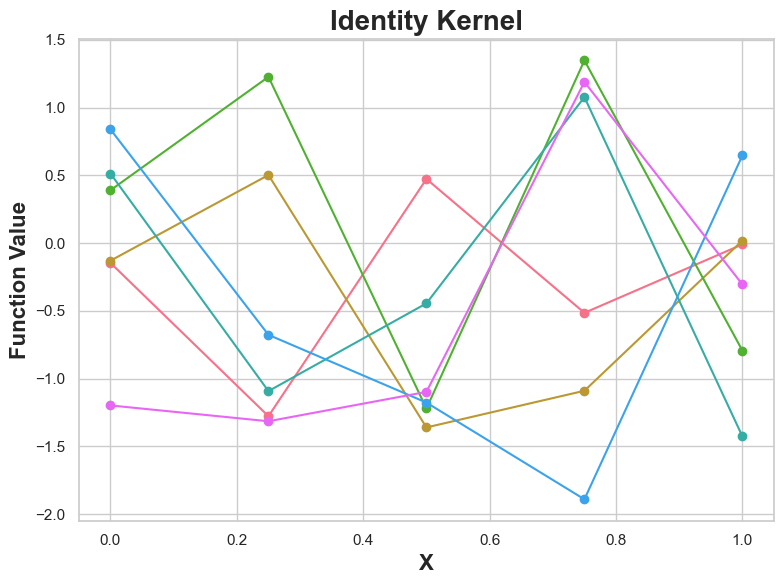

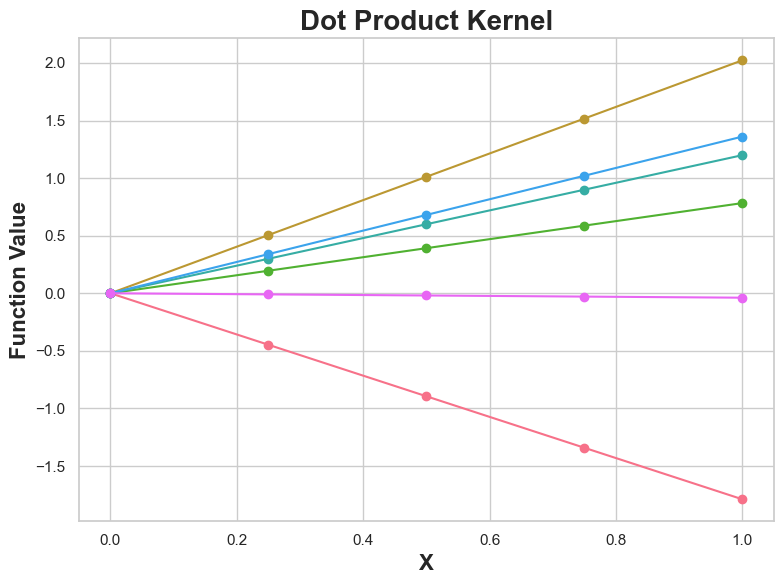

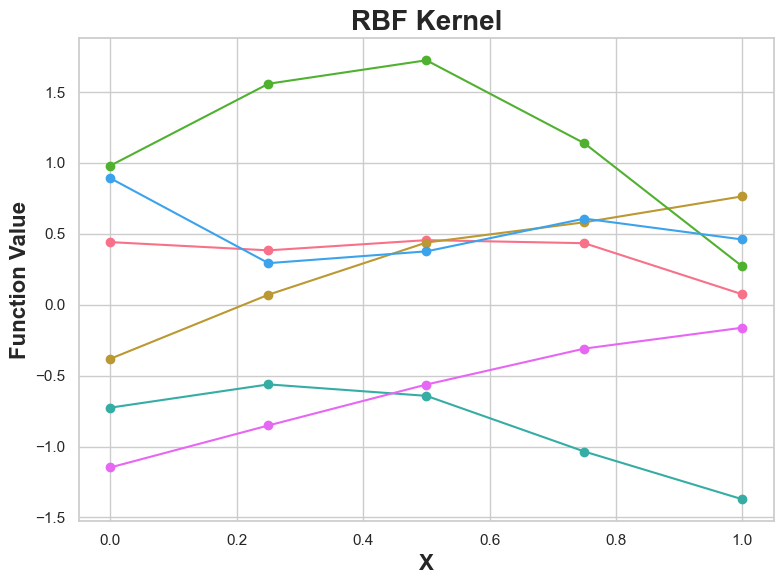

In [5]:
n = 5
m = 6

mean = np.zeros(n)

plt.clf()
Xshow = np.linspace(0, 1, n).reshape(-1, 1)  # n number test points in the range of (0, 1)

RBF = RBFK(Xshow, Xshow)
Dot = DotProductK(Xshow, Xshow)
Identity = np.eye(n)

covs = [Identity, Dot, RBF]
titles = ["Identity Kernel", "Dot Product Kernel", "RBF Kernel"]

# Generate plots for each kernel
sns.set(style="whitegrid")
for idx, (cov, title) in enumerate(zip(covs, titles)):
    plt.figure(figsize=(8, 6))
    f_prior = np.random.multivariate_normal(mean, cov, m).T
    colors = sns.color_palette("husl", m)  # Generate m distinct colors
    for i, color in enumerate(colors):
        plt.plot(Xshow, f_prior[:, i], '-o', linewidth=1.5, color=color, label=f"Sample {i+1}")
    plt.title(title, fontsize=20, weight='bold')
    plt.xlabel("X", fontsize=16, weight='bold')
    plt.ylabel("Function Value", fontsize=16, weight='bold')
    plt.tight_layout()
    #plt.savefig(f"{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Prior Posterior: Graphs

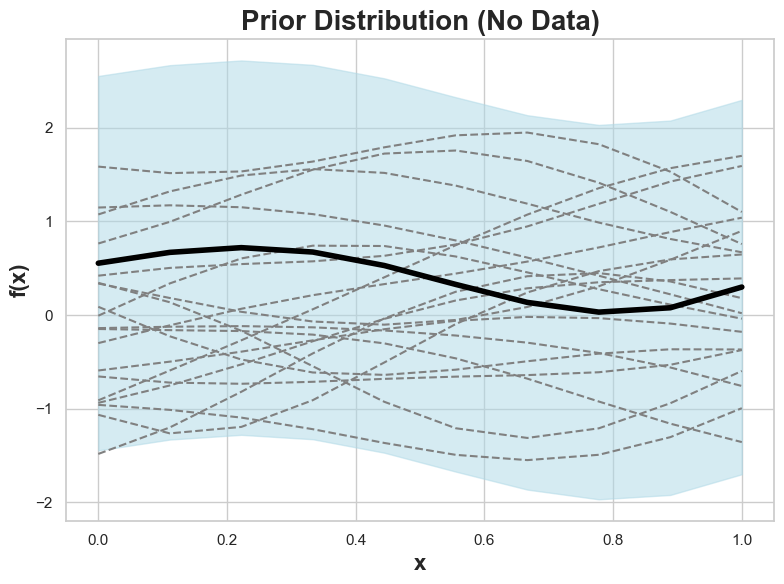

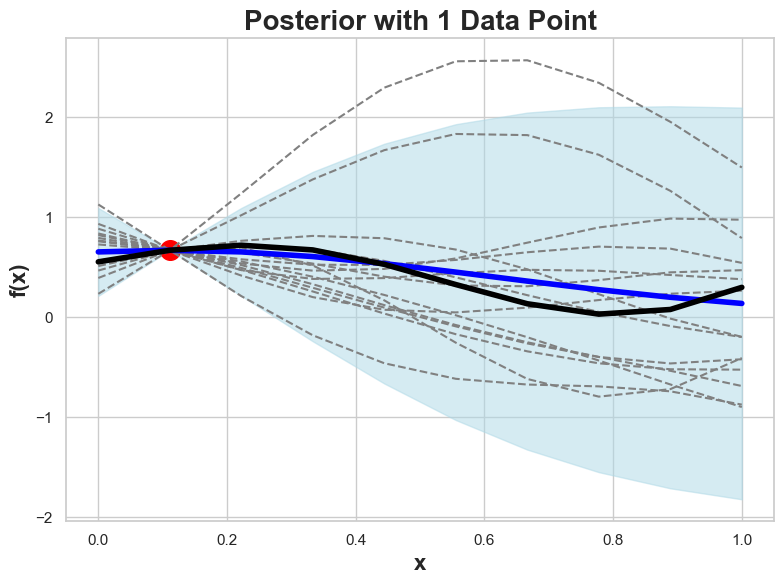

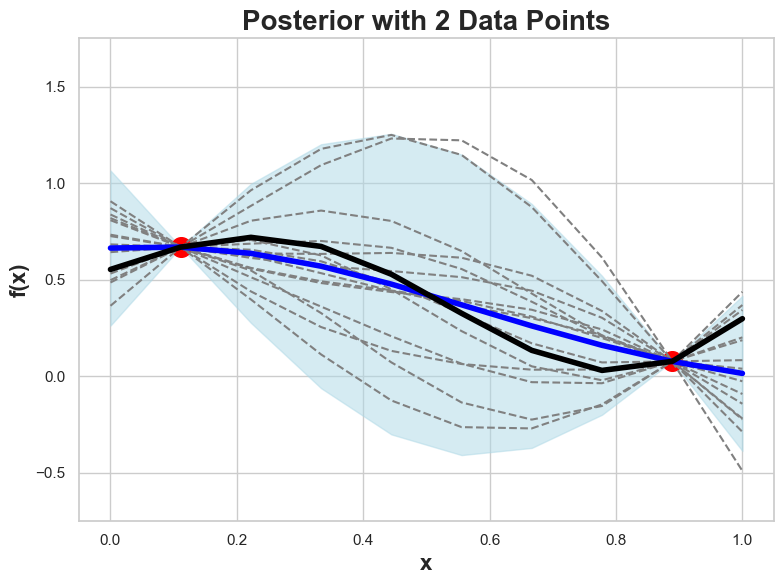

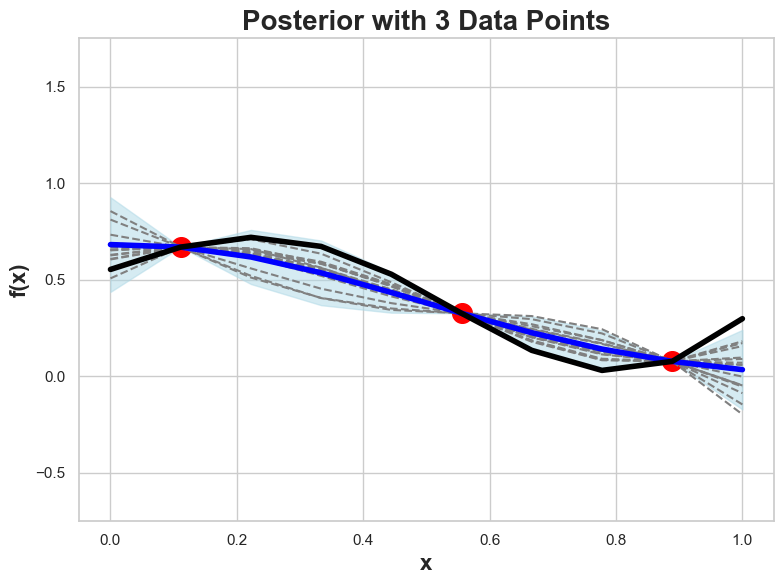

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# For consistency in random draws
np.random.seed(42)

# --- Setup and Prior Sampling ---
n = 10
m = 20
mean = np.zeros(n)
Xshow = np.linspace(0, 1, n).reshape(-1, 1)
RBF = RBFK(Xshow, Xshow)
cov = RBF

# Generate m functions from the prior
f_prior = np.random.multivariate_normal(mean, cov, m).T
std_prior = np.sqrt(np.diag(cov))

# --- Posterior with 1 Data Point ---
m_post = 15
Xtrain_1 = Xshow[1].reshape(-1, 1)
ftrain_1 = f_prior[1, 1].reshape(-1, 1)
A_1 = RBFK(Xtrain_1, Xtrain_1)
Ainv_1 = np.linalg.inv(A_1)
fstar_1 = RBFK(Xshow, Xtrain_1) @ Ainv_1 @ ftrain_1
varf_1 = RBFK(Xshow, Xshow) - RBFK(Xshow, Xtrain_1) @ Ainv_1 @ RBFK(Xtrain_1, Xshow)
std_post1 = np.sqrt(np.diag(varf_1))
posterior_samples1 = np.random.multivariate_normal(mean=fstar_1.flatten(), cov=varf_1, size=m_post)

# --- Posterior with 2 Data Points ---
Xtrain_2 = np.array([Xshow[1], Xshow[8]]).reshape(-1, 1)
ftrain_2 = np.array([f_prior[1, 1], f_prior[8, 1]]).reshape(-1, 1)
A_2 = RBFK(Xtrain_2, Xtrain_2)
Ainv_2 = np.linalg.inv(A_2)
fstar_2 = RBFK(Xshow, Xtrain_2) @ Ainv_2 @ ftrain_2
varf_2 = RBFK(Xshow, Xshow) - RBFK(Xshow, Xtrain_2) @ Ainv_2 @ RBFK(Xtrain_2, Xshow)
std_post2 = np.sqrt(np.diag(varf_2))
posterior_samples2 = np.random.multivariate_normal(mean=fstar_2.flatten(), cov=varf_2, size=m_post)

# --- Posterior with 3 Data Points ---
Xtrain_3 = np.array([Xshow[1], Xshow[5], Xshow[8]]).reshape(-1, 1)
ftrain_3 = np.array([f_prior[1, 1], f_prior[5, 1], f_prior[8, 1]]).reshape(-1, 1)
A_3 = RBFK(Xtrain_3, Xtrain_3)
Ainv_3 = np.linalg.inv(A_3)
fstar_3 = RBFK(Xshow, Xtrain_3) @ Ainv_3 @ ftrain_3
varf_3 = RBFK(Xshow, Xshow) - RBFK(Xshow, Xtrain_3) @ Ainv_3 @ RBFK(Xtrain_3, Xshow)
std_post3 = np.sqrt(np.diag(varf_3))
posterior_samples3 = np.random.multivariate_normal(mean=fstar_3.flatten(), cov=varf_3, size=m_post)

# Folder for saving all the plots:
folder = r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\\"

#########################################
# Plot 1: Prior Distribution (No Data)
#########################################
plt.figure(figsize=(8,6))
for i in range(m):
    plt.plot(Xshow, f_prior[:, i], '--', linewidth=1.5, color="gray")
plt.plot(Xshow, f_prior[:, 1], linewidth=4, color="black")
plt.fill_between(Xshow.flat, 
                 f_prior[:, 1] - 2 * std_prior, 
                 f_prior[:, 1] + 2 * std_prior, 
                 color="lightblue", alpha=0.5)
plt.title("Prior Distribution (No Data)", fontsize=20, weight='bold')
plt.xlabel("x", fontsize=16, weight='bold')
plt.ylabel("f(x)", fontsize=16, weight='bold')
plt.tight_layout()
#plt.savefig(folder + "Prior_Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

#########################################
# Plot 2: Posterior with 1 Data Point
#########################################
plt.figure(figsize=(8,6))
for i in range(m_post):
    plt.plot(Xshow, posterior_samples1[i], '--', linewidth=1.5, color="gray")
plt.plot(Xshow, fstar_1, '-', linewidth=4, color="blue")
plt.fill_between(Xshow.flat, 
                 fstar_1.flat - 2 * std_post1, 
                 fstar_1.flat + 2 * std_post1, 
                 color="lightblue", alpha=0.5)
plt.scatter(Xtrain_1, ftrain_1, s=200, color="red")
plt.plot(Xshow, f_prior[:, 1], linewidth=4, color="black")
plt.title("Posterior with 1 Data Point", fontsize=20, weight='bold')
plt.xlabel("x", fontsize=16, weight='bold')
plt.ylabel("f(x)", fontsize=16, weight='bold')
plt.tight_layout()
#plt.savefig(folder + "Posterior_1_Data_Point.png", dpi=300, bbox_inches="tight")
plt.show()

#########################################
# Plot 3: Posterior with 2 Data Points
#########################################
plt.figure(figsize=(8,6))
for i in range(m_post):
    plt.plot(Xshow, posterior_samples2[i], '--', linewidth=1.5, color="grey")
plt.plot(Xshow, fstar_2, '-', linewidth=4, color="blue")
plt.plot(Xshow, f_prior[:, 1], linewidth=4, color="black")
plt.fill_between(Xshow.flat, 
                 fstar_2.flat - 2 * std_post2, 
                 fstar_2.flat + 2 * std_post2, 
                 color="lightblue", alpha=0.5)
plt.scatter(Xtrain_2, ftrain_2, s=200, color="red")
plt.title("Posterior with 2 Data Points", fontsize=20, weight='bold')
plt.xlabel("x", fontsize=16, weight='bold')
plt.ylabel("f(x)", fontsize=16, weight='bold')
plt.ylim(-0.75, 1.75)
plt.tight_layout()
#plt.savefig(folder + "Posterior_2_Data_Points.png", dpi=300, bbox_inches="tight")
plt.show()

#########################################
# Plot 4: Posterior with 3 Data Points
#########################################
plt.figure(figsize=(8,6))
for i in range(m_post):
    plt.plot(Xshow, posterior_samples3[i], '--', linewidth=1.5, color="grey")
plt.plot(Xshow, fstar_3, '-', linewidth=4, color="blue")
plt.plot(Xshow, f_prior[:, 1], linewidth=4, color="black")
plt.fill_between(Xshow.flat, 
                 fstar_3.flat - 2 * std_post3, 
                 fstar_3.flat + 2 * std_post3, 
                 color="lightblue", alpha=0.5)
plt.scatter(Xtrain_3, ftrain_3, s=200, color="red")
plt.title("Posterior with 3 Data Points", fontsize=20, weight='bold')
plt.xlabel("x", fontsize=16, weight='bold')
plt.ylabel("f(x)", fontsize=16, weight='bold')
plt.grid(True)
plt.ylim(-0.75, 1.75)
plt.tight_layout()
#plt.savefig(folder + "Posterior_3_Data_Points.png", dpi=300, bbox_inches="tight")
plt.show()


#### Kernel Plots

In [7]:
from __future__ import division
import numpy as np
import pandas as pd
import math as math
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic,ExpSineSquared,PairwiseKernel,DotProduct
from tqdm import tqdm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
import joblib

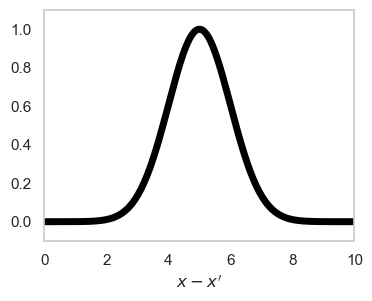

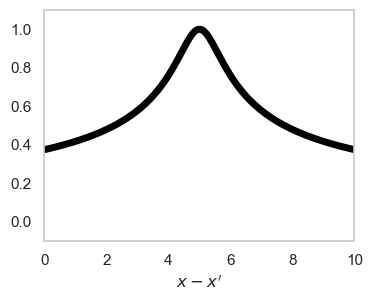

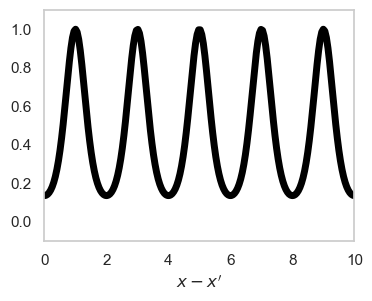

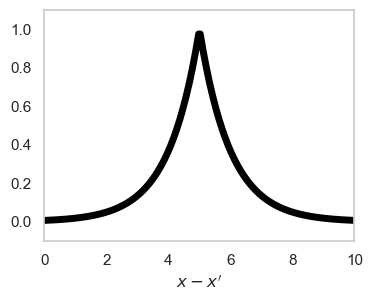

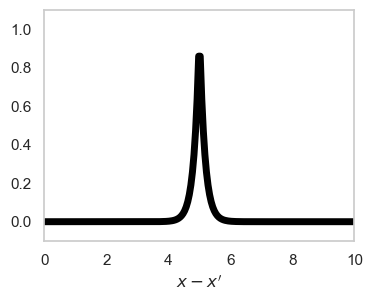

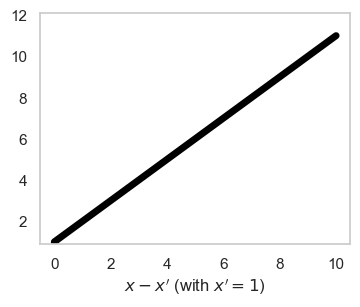

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ExpSineSquared, Matern, PairwiseKernel, DotProduct

# Set random seed for reproducibility
np.random.seed(42)

# Define kernels
kernels = {
    "RBF (SE)": RBF(length_scale=1.0),
    "Rational Quadratic": RationalQuadratic(length_scale=1.0, alpha=0.25),
    "Periodic": ExpSineSquared(length_scale=1.0, periodicity=2.0),
    "Matern (ν=0.5)": Matern(length_scale=1.0, nu=.5),
    "Laplace (Exponential)": PairwiseKernel(gamma=6, metric='laplacian'),
    "Linear (Dot Product)": DotProduct(sigma_0=1)
}

# Define input space
x = np.linspace(0, 10, 200).reshape(-1, 1)

# Loop over kernels and save each plot individually
for name, kernel in kernels.items():
    plt.figure(figsize=(4, 3))  # Standard plot size

    # Handle DotProduct kernel separately
    if isinstance(kernel, DotProduct):
        K = kernel(x, np.ones((1, 1)))  # x' = 1
        xlabel = r"$x-x'$ (with $x' = 1$)"
        ymin, ymax = K.min() - 0.1 * abs(K.min()), K.max() + 0.1 * abs(K.max())  # Auto limits
        plt.ylim(ymin, ymax)
    else:
        K = kernel(x, [[5]])  # Arbitrary x' fixed at 5 for consistency
        xlabel = r"$x - x'$"
        plt.xlim(0,10)
        plt.ylim(-0.1,1.1)

    # Plot kernel function
    plt.plot(x, K, linewidth=5, color='black')
    
    # Add x and y axis labels and ticks
    plt.xlabel(xlabel, fontsize=12)
    #plt.ylabel(r"$k(x, x')$", fontsize=12)
    #plt.title(name, fontsize=12)


    # Optional: grid for clarity
    plt.grid(False)


    #filename = name.replace(" ", "_").replace("(", "").replace(")", "").replace("=", "").replace("ν", "nu")
    #plt.savefig(fr"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\Kernel_{filename}.png", dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()






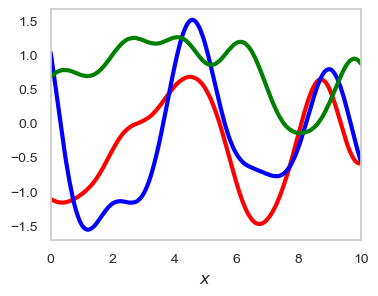

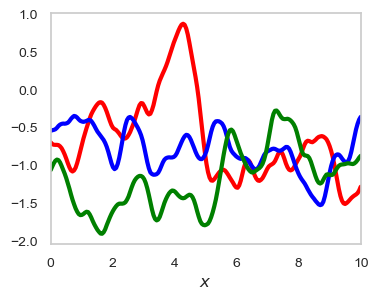

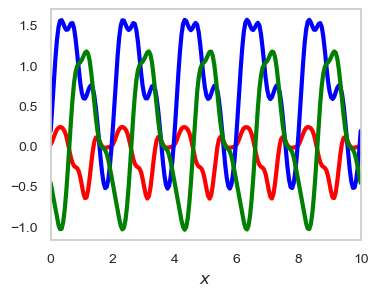

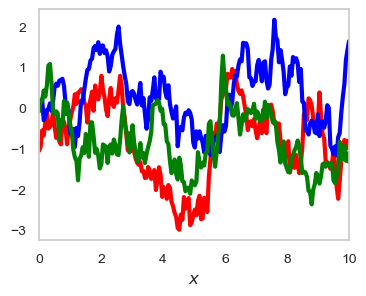

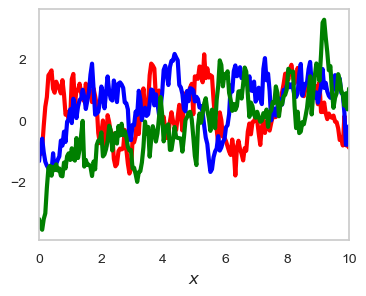

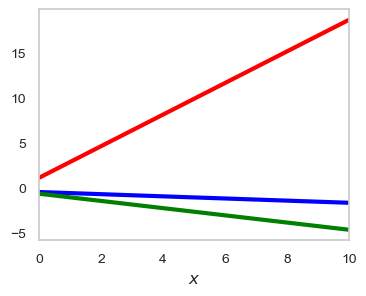

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ExpSineSquared, Matern, PairwiseKernel, DotProduct

# Set random seed for reproducibility
np.random.seed(42)

# Define kernels
kernels = {
    "RBF (SE)": RBF(length_scale=1.0),
    "Rational Quadratic": RationalQuadratic(length_scale=1.0, alpha=0.1),
    "Periodic": ExpSineSquared(length_scale=1.0, periodicity=2.0),
    "Matern (ν=0.5)": Matern(length_scale=1.0, nu=0.5),
    "Laplace (Exponential)": PairwiseKernel(gamma=2, metric='laplacian'),
    "Linear (Dot Product)": DotProduct(sigma_0=1.0)
}

# Input space
x = np.linspace(0, 10, 200).reshape(-1, 1)
m = 3  # number of function samples
colors = ["red", "blue", "green"]

# Loop over kernels and save each sampled function plot individually
for name, kernel in kernels.items():
    plt.figure(figsize=(4, 3))  # Standard plot size to match other kernel plots

    # Compute covariance matrix
    cov = kernel(x, x)
    mean = np.zeros(x.shape[0])

    # Sample from GP prior, add jitter for numerical stability
    f_prior = np.random.multivariate_normal(mean, cov + 1e-6 * np.eye(len(mean)), m).T

    # Plot sampled functions
    for j in range(m):
        plt.plot(x, f_prior[:, j], linewidth=3, color=colors[j])

    # Add x-axis label and standard limits
    plt.xlabel(r"$x$", fontsize=12)
    plt.xlim(0, 10)

    # Optional: set y-axis limits for consistency (can adjust based on samples)
    # plt.ylim(-3, 3)  # Uncomment if you want fixed y-limits

    # Optional: grid for better readability
    plt.grid(False)

    # Optional: add ticks
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Optional: to hide ticks and frame completely (comment out the lines above if you prefer this style)
    # plt.xticks([])  
    # plt.yticks([])
    # plt.box(False)


    #filename = name.replace(" ", "_").replace("(", "").replace(")", "").replace("=", "").replace("ν", "nu")
    #plt.savefig(fr"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\KernelSample_{filename}.png", dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()  # Close figure to avoid overlap


# GPR hyper-parameter effect:Graphs

In [10]:
def Kernel(a, b, var, l):
    # Ensure inputs are at least 2D
    a = np.atleast_2d(a).T if a.ndim == 1 else np.atleast_2d(a)
    b = np.atleast_2d(b).T if b.ndim == 1 else np.atleast_2d(b)
    
    # Compute squared distances
    sqdist = np.sum(a**2, axis=1).reshape(-1, 1) + np.sum(b**2, axis=1) - 2 * np.dot(a, b.T)
    return var * np.exp(-0.5 * sqdist / l**2)

def GPR(xtest, xtrain,Nobs,sigma, l):
    y = f(xtrain)
    A = Kernel(xtrain, xtrain, sigma, l)
    Ainv = np.linalg.inv(A)
    fstar = Kernel(xtest, xtrain, sigma, l) @ Ainv @ y
    varf = Kernel(xtest, xtest, sigma, l) - Kernel(xtest, xtrain, sigma, l) @ Ainv @ Kernel(xtrain, xtest, sigma, l)
    varfxtest = varf.diagonal()
    std = np.sqrt(np.abs(varfxtest))
    return fstar, std

def f(x):
    return np.sin(0.9 * x)

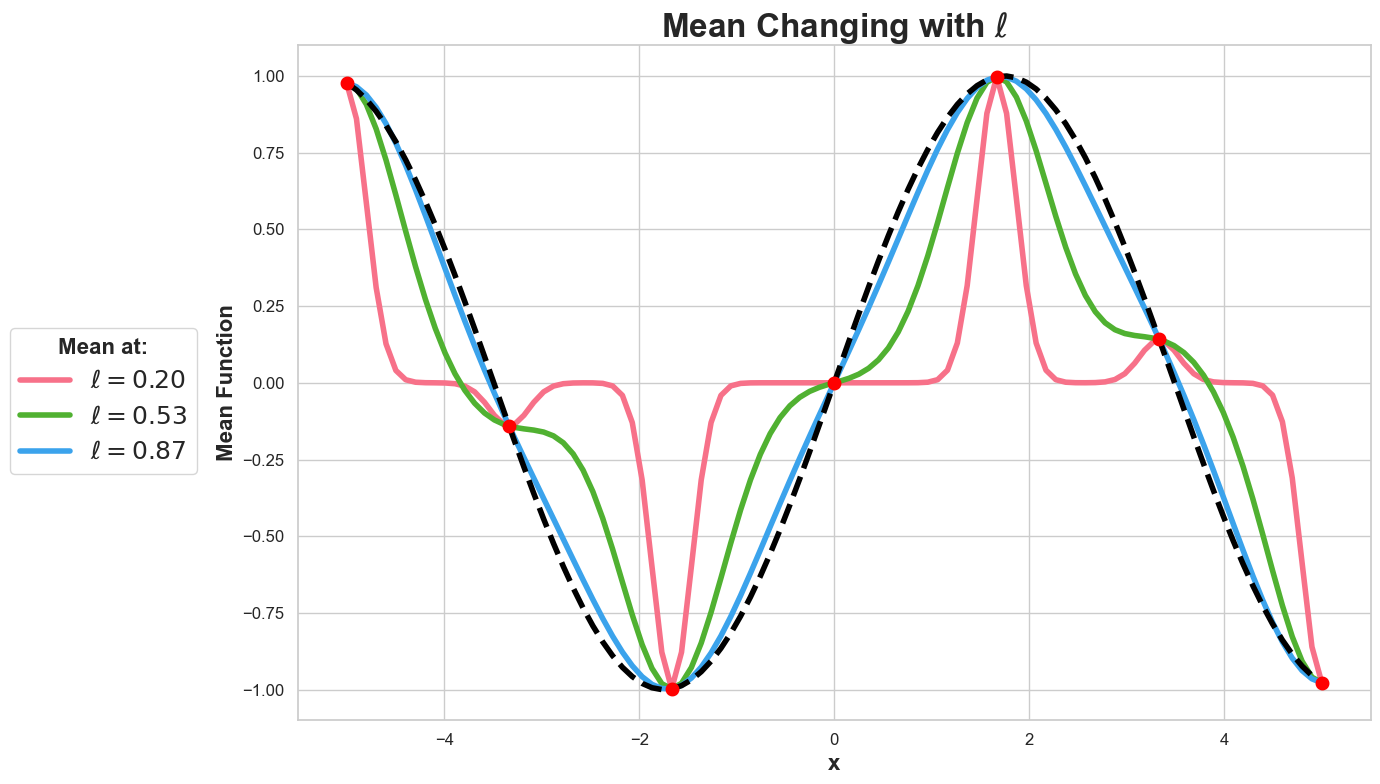

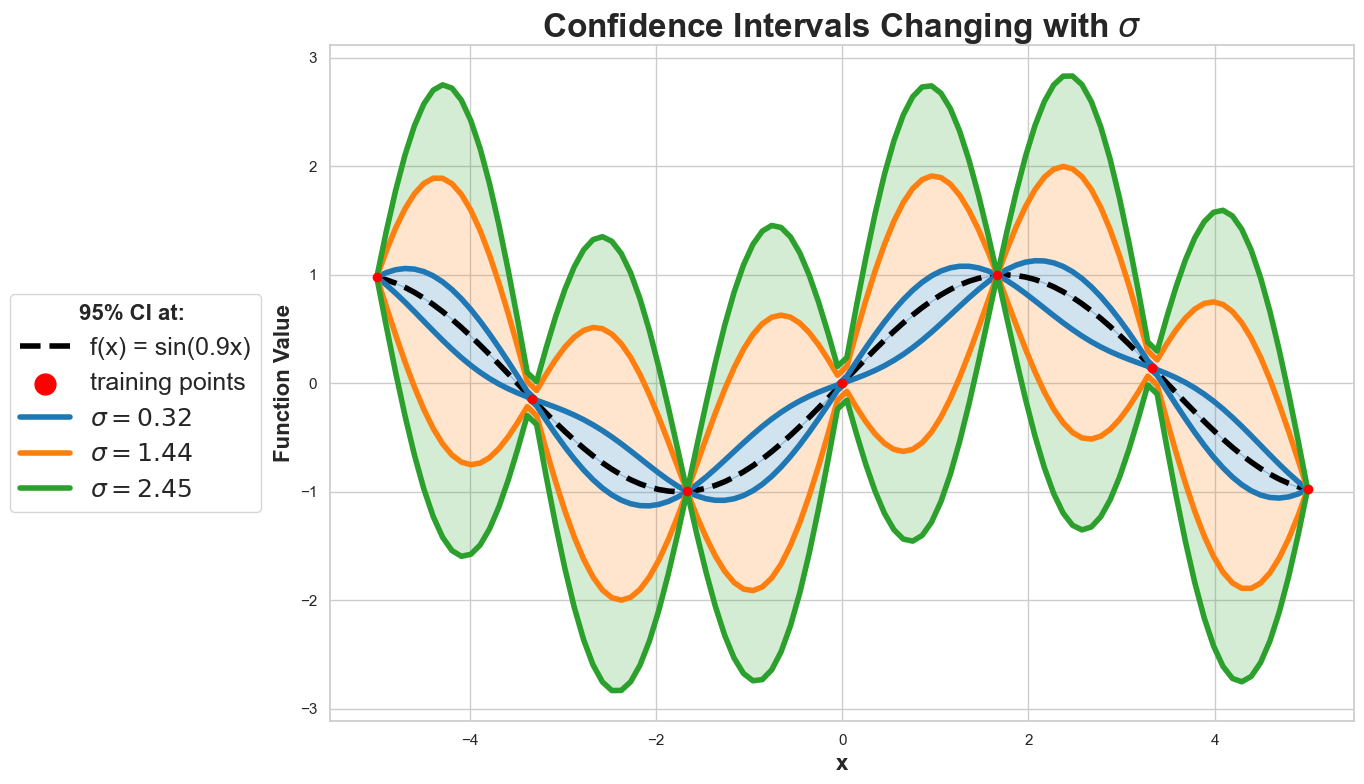

In [ ]:
# Seaborn style
sns.set(style="whitegrid")

# Generate data
x = np.linspace(-5, 5, 100)
xtrain = np.linspace(-5, 5, 7)

# Length scales to iterate through
ls = np.array([0.2, 0.53333333, 0.8666667])

# Initialize the plot
plt.figure(figsize=(14, 8))  # Consistent figure size

# Define a color palette with distinct colors
colors = sns.color_palette("husl", len(ls))

# Plot the mean for each length scale
for idx, l in enumerate(ls):
    mean, std = GPR(x, xtrain, 7, 1, l)
    plt.plot(
        x, 
        mean, 
        label=f"$ \\ell = {l:.2f}$", 
        color=colors[idx], 
        linewidth=4
    )

# Add training points for reference
plt.plot(x, f(x), '--', color='black', linewidth=4)
plt.scatter(xtrain, f(xtrain), color="red", linewidth=4, zorder=5)

# Add labels, title, and legend
plt.title("Mean Changing with $\\ell$", fontsize=24, weight="bold")
plt.xlabel("x", fontsize=16, weight="bold")
plt.ylabel("Mean Function", fontsize=16, weight="bold")

# Add legend with a title
legend = plt.legend(
    loc="upper left", 
    bbox_to_anchor=(-0.28, 0.6),  # Top left, outside the plot
    fontsize=18, 
    markerscale=2.5,
    ncol=1,
    frameon=True,
    title="Mean at:"  # Legend title
)
legend.get_title().set_fontsize(16)
legend.get_title().set_weight("bold")
#legend.get_frame().set_facecolor('lightgrey')  # Set the background color to grey
#legend.get_frame().set_edgecolor('lightgrey')  # Optional: Add a black edge to the frame
#legend.get_frame().set_alpha(0.5)  # Optional: Set opacity (1 = solid)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot
#plt.savefig("Mean_Changing_with_Length.png", bbox_inches="tight", dpi=300)
#plt.savefig(fr"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\RBFhyperparameter", dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

# --------------------------------------
# Second Plot: Confidence Intervals
# --------------------------------------

# Seaborn style
sns.set(style="whitegrid")

# Generate data
vars = np.array([0.1, 2.066666667, 6])

# Define a color palette with distinct colors
colors = sns.color_palette("tab10", len(vars))

# Initialize the plot
plt.figure(figsize=(14, 8))  # Consistent figure size

# Plot the true function
plt.plot(x, f(x), color="black", linewidth=4, linestyle="--",label='f(x) = sin(0.9x)')
plt.scatter(xtrain, f(xtrain), color="red", zorder=5,label='training points')

previous_upper = None
previous_lower = None

for idx, var in enumerate(vars):
    mean, std = GPR(x, xtrain, 7, var, 1)
    upper = mean + 2 * std
    lower = mean - 2 * std
    
    # Plot the upper and lower bounds
    plt.plot(
        x, 
        upper, 
        color=colors[idx], 
        linestyle='-', 
        label=f'$\\sigma = {np.sqrt(var):.2f}$',
        linewidth=4
    )
    plt.plot(
        x, 
        lower, 
        color=colors[idx], 
        linestyle='-',
        linewidth=4
    )
    
    # Fill between bounds
    if idx == 0:
        plt.fill_between(x, lower, f(x), color=colors[idx], alpha=0.2)
        plt.fill_between(x, upper, f(x), color=colors[idx], alpha=0.2)
    else:
        plt.fill_between(x, lower, previous_lower, color=colors[idx], alpha=0.2)
        plt.fill_between(x, upper, previous_upper, color=colors[idx], alpha=0.2)
    
    previous_upper = upper
    previous_lower = lower



# Add legend and labels
plt.title("Confidence Intervals Changing with $\\sigma$", fontsize=24, weight="bold")
plt.xlabel("x", fontsize=16, weight="bold")
plt.ylabel("Function Value", fontsize=16, weight="bold")

# Add legend with a title
legend = plt.legend(
    loc="upper left", 
    bbox_to_anchor=(-0.325, .65),  # Top left, outside the plot
    fontsize=18, 
    ncol=1,
    markerscale=2.5,
    frameon=True,
    title="95% CI at: "
)
legend.get_title().set_fontsize(16)
legend.get_title().set_weight("bold")
#legend.get_frame().set_facecolor('lightgrey')  # Set the background color to grey
#legend.get_frame().set_edgecolor('lightgrey')  # Optional: Add a black edge to the frame
#legend.get_frame().set_alpha(0.5)  # Optional: Set opacity (1 = solid)

# Save the plot
#plt.savefig("Confidence_Intervals_Changing_with_Variance.png", bbox_inches="tight", dpi=300)

# Show the plot
plt.tight_layout()
plt.show()


# Parameter Optimisation using Log Likelihood: Graphs

In [12]:
def Kernel(a, b, sigma, l):
    sqdist = np.sum(a**2, axis=1).reshape(-1, 1) + np.sum(b**2, axis=1) - 2 * np.dot(a, b.T)
    return sigma * np.exp(-0.5 * sqdist / l**2)

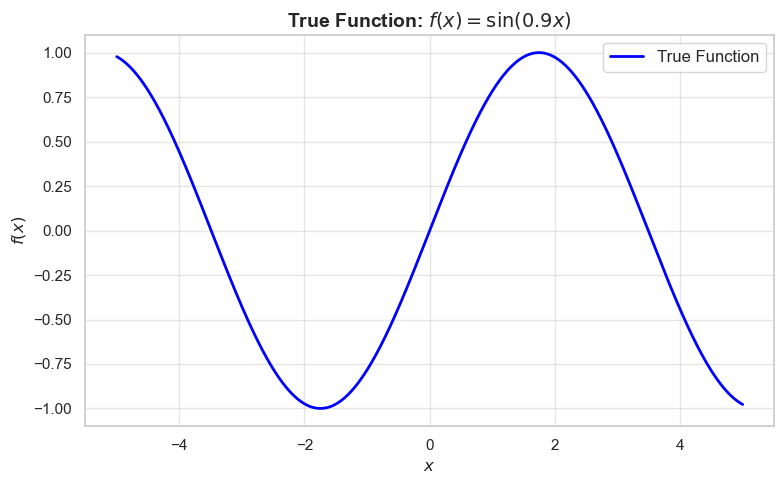

In [21]:
# The true function
def f(x):
    return np.sin(0.9 * x)
# Generate input values
x = np.linspace(-5, 5, 1000)
# Plot the true function
plt.figure(figsize=(8, 5))
plt.plot(x, f(x), label="True Function", color="blue", linewidth=2)
plt.title("True Function: $f(x) = \\sin(0.9x)$", fontsize=14, weight="bold")
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$f(x)$", fontsize=12)
#plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)  # Add a horizontal line at y=0
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Log Likelihood

In [22]:
def marglike(param,X,Y):
  l = param[0]
  var = param[1]
  noise = param[2]
  n = len(X)
  k = Kernel(X,X,var,l) + (noise)**2*np.eye(n,n)
  inverse = np.linalg.inv(k)
  ml = (1/2)*(Y.T@inverse@Y) + 1/2* np.linalg.slogdet(k)[1]
  return ml[0][0]

[initl,initvar,initnoise] = [2,1,3]
xtrain = np.linspace(-5,5,7).reshape(-1,1)
bounds = [(1e-100, 1e100)]   ## These are bounds in for which minimisation can occur
noise = 0

re = minimize(marglike,[initl,initvar,initnoise],args=(xtrain,f(xtrain)),method="L-BFGS-B",bounds = bounds,options = {'disp':True})
loptimal = re.x[0]
varoptimal = re.x[1]
print(f"Optimal length scale parameter: {loptimal}")
print(f"Optimal variance scale parameter: {varoptimal}")
print(f"Optimal noise scale parameter: {re.x[2]}")  

Optimal length scale parameter: 2.252896610137205
Optimal variance scale parameter: 1.2033658359695223
Optimal noise scale parameter: 1e-100


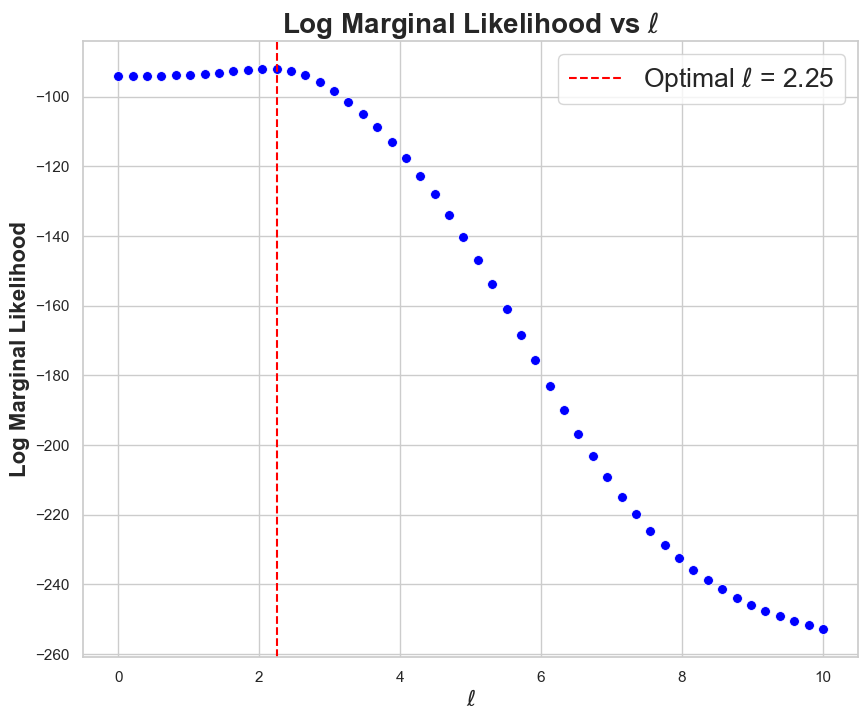

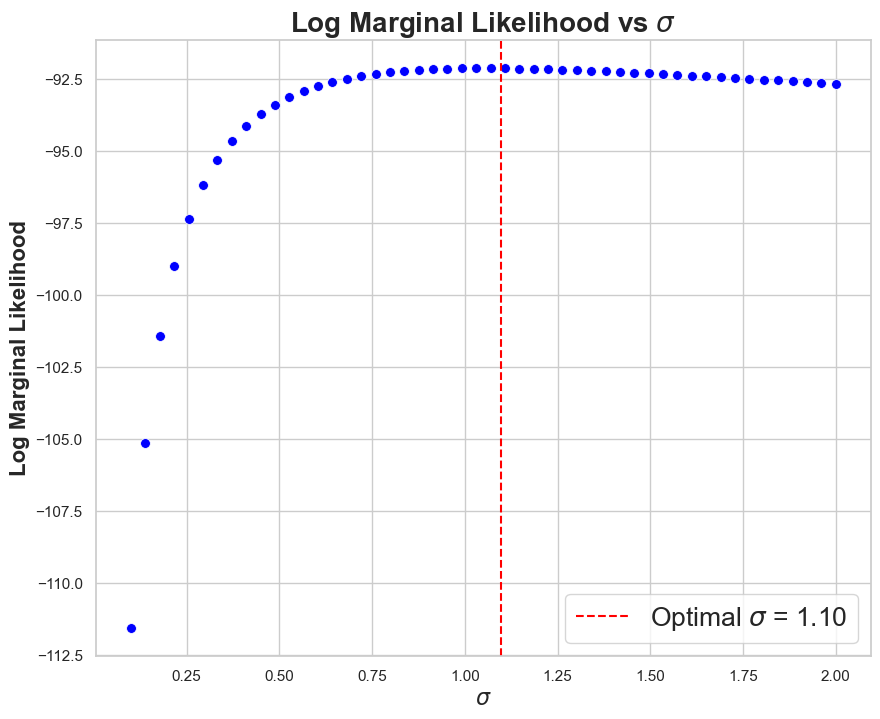

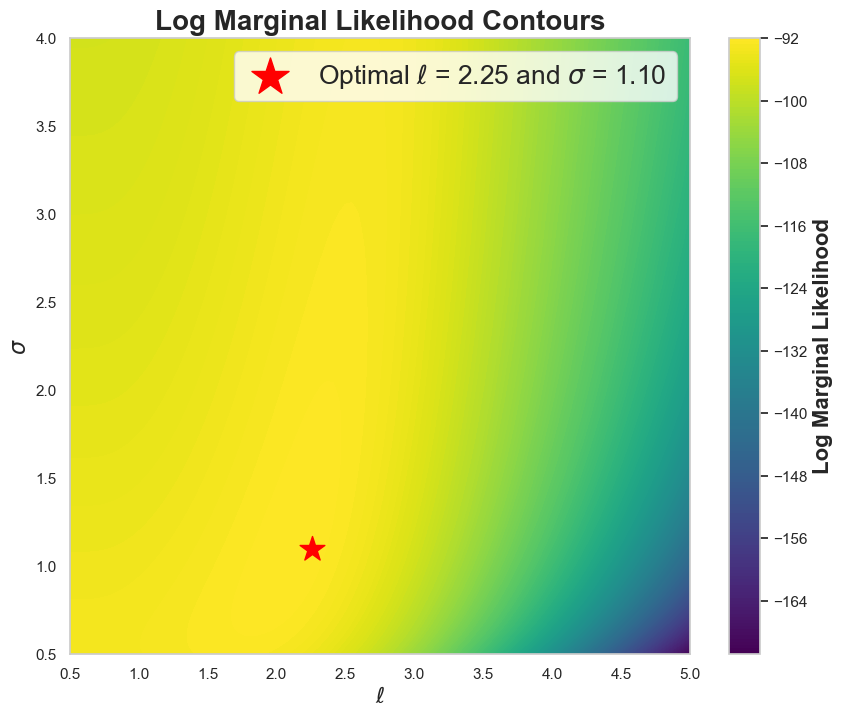

In [215]:
Ntrain, Neval = 7, 100
x = np.linspace(-5, 5, Ntrain).reshape(-1, 1)
y = f(x)
noise = 0.1


# --- Graph 1: Log Marginal Likelihood vs Length ---
l_values = np.linspace(0.001, 10, 50)
loglike_l = [
    -0.5 * y.T @ np.linalg.inv(Kernel(x, x, 1.07, l) + noise**2 * np.identity(Ntrain)) @ y
    - 0.5 * np.log(np.linalg.det(Kernel(x, x, 1.07, l) + noise**2 * np.identity(Ntrain)))
    - Neval / 2 * np.log(2 * np.pi)
    for l in l_values
]

plt.figure(figsize=(10, 8))
plt.axvline(x=loptimal, color='red', linestyle='--', linewidth=1.5, label="Optimal $\\ell$ = %0.2f"%loptimal)
sns.scatterplot(x=np.ravel(l_values), y=np.ravel(loglike_l), color="blue", s=50)
plt.xlabel("$\\ell$", size=16, weight='bold')
plt.ylabel("Log Marginal Likelihood", size=16, weight='bold')
plt.title("Log Marginal Likelihood vs $\\ell$", size=20, weight='bold')
plt.legend(fontsize=19, markerscale=1)
plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\Log_Marginal_Likelihood_vs_Length.png", bbox_inches="tight", dpi=300)
plt.show()

# --- Graph 2: Log Marginal Likelihood vs Sigma ---
# Check and handle array length mismatches

sigmas = np.linspace(0.1, 2, 50)
loglike_sigma = [
    -0.5 * y.T @ np.linalg.inv(Kernel(x, x, sigma, 2.1) + noise**2 * np.identity(Ntrain)) @ y
    - 0.5 * np.log(np.linalg.det(Kernel(x, x, sigma, 2.1) + noise**2 * np.identity(Ntrain)))
    - Neval / 2 * np.log(2 * np.pi)
    for sigma in sigmas
]
min_length = min(len(sigmas), len(loglike_sigma))
sigmas = sigmas[:min_length]
loglike_sigma = loglike_sigma[:min_length]

plt.figure(figsize=(10, 8))
plt.axvline(x=np.sqrt(varoptimal), color='red', linestyle='--', linewidth=1.5, label="Optimal $\\sigma$ = %0.2f"%np.sqrt(varoptimal))
sns.scatterplot(x=np.ravel(sigmas), y=np.ravel(loglike_sigma), color="blue", s=50)
plt.xlabel("$\\sigma$", size=16, weight='bold')
plt.ylabel("Log Marginal Likelihood", size=16, weight='bold')
plt.title("Log Marginal Likelihood vs $\\sigma$", size=20, weight='bold')
plt.legend(fontsize=19, markerscale=2)
plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\Log_Marginal_Likelihood_vs_Variance.png", bbox_inches="tight", dpi=300)
plt.show()

# --- Graph 3: Log Marginal Likelihood Contours ---

sigmas = np.linspace(0.5, 4, 100)
length_scale_values = np.linspace(0.5, 5, 100)
L, N = np.meshgrid(length_scale_values, sigmas)
loglike = np.array([
    -0.5 * y.T @ np.linalg.inv(Kernel(x, x, sigma, l) + noise**2 * np.identity(Ntrain)) @ y
    - 0.5 * np.log(np.linalg.det(Kernel(x, x, sigma, l) + noise**2 * np.identity(Ntrain)))
    - Neval / 2 * np.log(2 * np.pi)
    for sigma in sigmas for l in length_scale_values
]).reshape(len(sigmas), len(length_scale_values))

plt.figure(figsize=(10, 8))
contour = plt.contourf(L, N, loglike, levels=200, cmap="viridis")
colorbar = plt.colorbar(contour, label="Log Marginal Likelihood")
colorbar.set_label("Log Marginal Likelihood", fontsize=16, weight='bold')
plt.scatter(loptimal, np.sqrt(varoptimal), marker='*', color='red', s=350, label="Optimal $\\ell$ = %0.2f and $\\sigma$ = %0.2f"%(loptimal,np.sqrt(varoptimal)))
plt.xlabel("$\\ell$", size=16, weight='bold')
plt.ylabel("$\\sigma$", size=16, weight='bold')
plt.title("Log Marginal Likelihood Contours", size=20, weight='bold')
plt.legend(fontsize=19, markerscale=1.5)
plt.savefig(r"C:\Users\seanw\OneDrive\Desktop\GitHub\FYP\Latex\LatexPlots\1dplots\Log_Marginal_Likelihood_Contours.png", bbox_inches="tight", dpi=300)
plt.show()

# Cross Validation L2 norm: Graphs

In [87]:
def Kernel(a, b, sigma, l):
    # Ensure inputs are at least 2D
    a = np.atleast_2d(a).T if a.ndim == 1 else np.atleast_2d(a)
    b = np.atleast_2d(b).T if b.ndim == 1 else np.atleast_2d(b)
    
    # Compute squared distances
    sqdist = np.sum(a**2, axis=1).reshape(-1, 1) + np.sum(b**2, axis=1) - 2 * np.dot(a, b.T)
    return sigma * np.exp(-0.5 * sqdist / l**2)

def GPR(xtest, xtrain,Nobs,sigma, l):
    y = f(xtrain)
    A = Kernel(xtrain, xtrain, sigma, l)
    Ainv = np.linalg.inv(A)
    fstar = Kernel(xtest, xtrain, sigma, l) @ Ainv @ y
    varf = Kernel(xtest, xtest, sigma, l) - Kernel(xtest, xtrain, sigma, l) @ Ainv @ Kernel(xtrain, xtest, sigma, l)
    varfxtest = varf.diagonal()
    std = np.sqrt(np.abs(varfxtest))
    return fstar, std

In [89]:
param = 2 # length width
Nobs = 7
Ncheck = 2
### to make generic must change pairs to other dimensions
l = param
var = 1.07 ### variance
Ntrain = Nobs - Ncheck
Neval = 100
x = np.linspace(-5,5,Neval)
start_index = 0
end_index = Neval - 1
step_size = (end_index - start_index) / (Nobs - 1)
indices = []
for i in range(Nobs):
    indices.append(int(start_index + i * step_size))
indices = np.array(indices)
xtrain = x[indices]
js = np.arange(1, Nobs - 1, dtype=int)
pairs = np.array(list(combinations(js, Ncheck)))
N = len(pairs)
count = 0
totaldiff = 0 
pairwisedif = np.zeros(N)
while(count<N):
    xcheck = []
    i = pairs[count,0]
    j = pairs[count,1]
    xcheck.append(xtrain[i])
    xcheck.append(xtrain[j])
    num = np.array([np.argwhere(x == xchk).item() for xchk in xcheck])
    #print(num)
    xt = np.delete(xtrain,[i,j])
    mean,std = GPR(x,xt,Ntrain,var,l)
    dif = 0 
    for i in range(Ncheck):
        dif+=(mean[num[i]]-f(xcheck[i]))**2
    dif = 1/Ncheck*np.sqrt(dif)
    pairwisedif[count]=dif
    count+=1

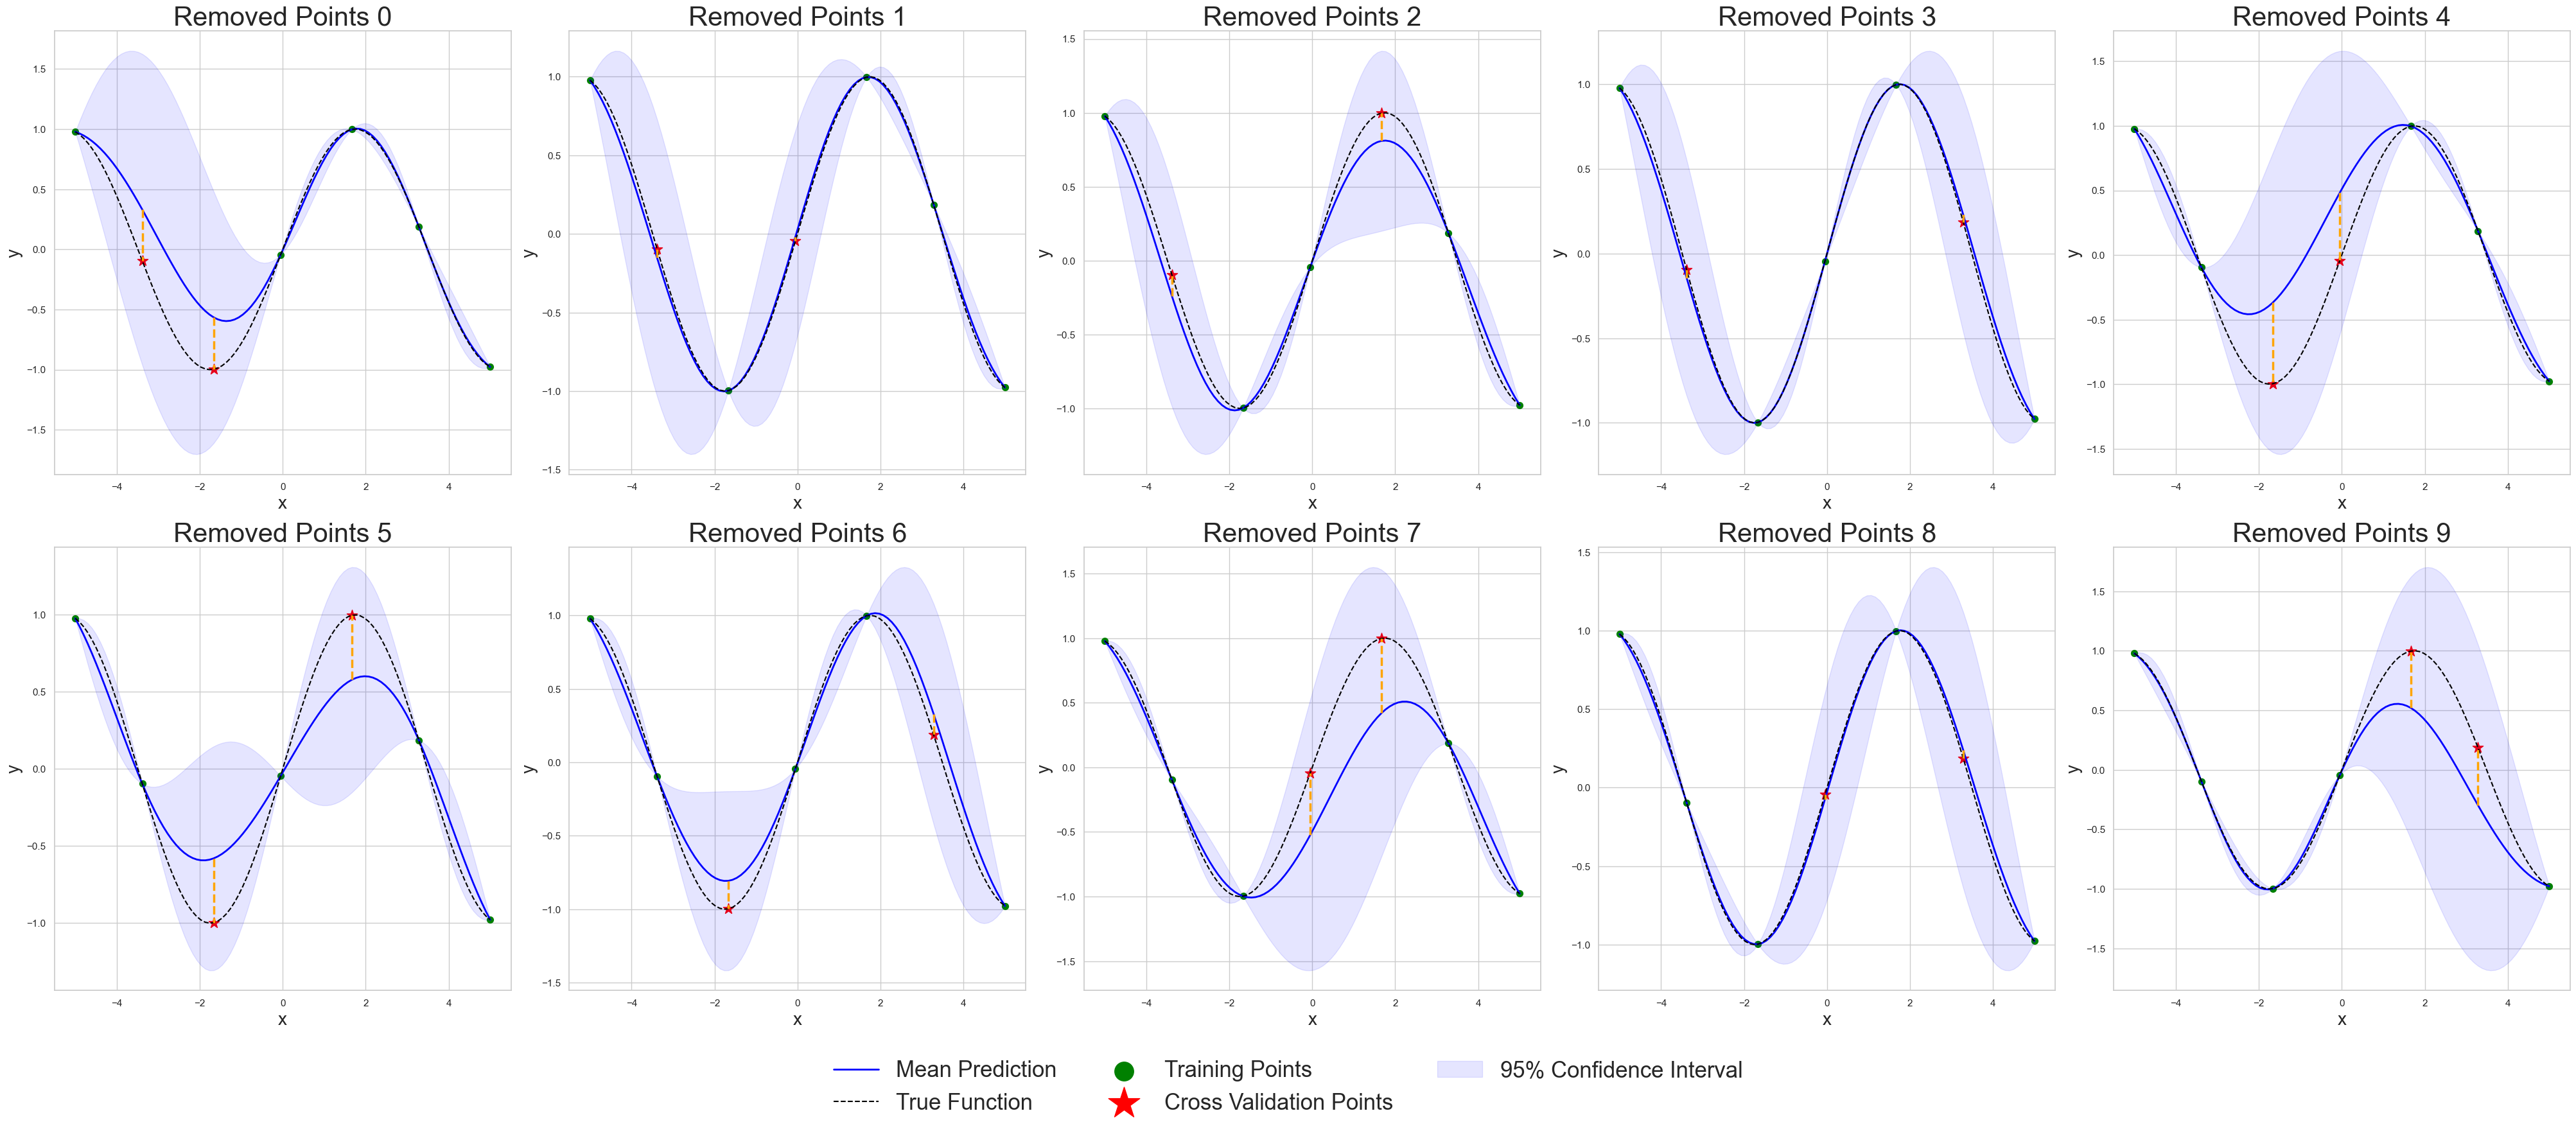

In [91]:
# Seaborn style
sns.set(style="whitegrid")

# Initialize subplots for a 2x2 grid
fig, axes = plt.subplots(2, 5, figsize=(40, 16), constrained_layout=True)
axes = axes.ravel()  # Flatten the 2x2 array for easier indexing

# Loop for selected pairs
for ax, count in zip(axes, [0,1,2,3, 4,5, 6, 7,8,9]):
    xcheck = [xtrain[pairs[count, 0]], xtrain[pairs[count, 1]]]
    num = np.array([np.argwhere(x == xchk).item() for xchk in xcheck])
    xt = np.delete(xtrain, [pairs[count, 0], pairs[count, 1]])
    mean, std = GPR(x, xt, Ntrain, var, l)

    dif = np.mean([(mean[num[i]] - f(xcheck[i]))**2 for i in range(Ncheck)])**0.5

    # Plot
    ax.plot(x, mean, label="Mean Prediction", color="blue", linewidth=2)
    ax.plot(x, f(x), label="True Function", color="black", linestyle="--")
    ax.scatter(xt, f(xt), s=50, label="Training Points", color="green")
    ax.scatter([x[num[0]], x[num[1]]], [f(x[num[0]]), f(x[num[1]])], 
           s=150, color="red", marker='*', label="Cross Validation Points")
    ax.fill_between(
        x, mean - 2 * std, mean + 2 * std, color="blue", alpha=0.1, label="95% Confidence Interval"
    )
    ax.plot([x[num[0]], x[num[0]]], [mean[num[0]], f(x[num[0]])], color="orange", linestyle="--", linewidth=2.5)
    ax.plot([x[num[1]], x[num[1]]], [mean[num[1]], f(x[num[1]])], color="orange", linestyle="--", linewidth=2.5)

    ax.set_title(f"Removed Points {count}",size = 30)
    ax.set_xlabel("x",size = 20)
    ax.set_ylabel("y",size = 20)

# Add a shared legend below the grid
fig.legend(
    labels=["Mean Prediction", "True Function", "Training Points", "Cross Validation Points","95% Confidence Interval"],
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fontsize=25,  # Increase the font size
    markerscale = 3,  # Scale up the marker size in the legend
    frameon=False
)

# Save the plot
#plt.savefig('PointsRemoved', bbox_inches='tight')

# Show the plots
plt.show()


### Aggregate
As in sum the L2norm when taking out each different combination of 2 points and minimise this.

In [94]:
param = 2 # length width
def L2norm(param):
    Nobs = 7
    Ncheck = 2
    ### to make generic must change pairs to other dimensions
    l = param
    var = 1.07 ### variance
    Ntrain = Nobs - Ncheck
    Neval = 100
    x = np.linspace(-5,5,Neval)
    start_index = 0
    end_index = Neval - 1
    step_size = (end_index - start_index) / (Nobs - 1)
    indices = []
    for i in range(Nobs):
        indices.append(int(start_index + i * step_size))
    indices = np.array(indices)
    xtrain = x[indices]
    js = np.arange(1, Nobs - 1, dtype=int)
    pairs = np.array(list(combinations(js, Ncheck)))
    N = len(pairs)
    count = 0
    totaldiff = 0
    pairwisedif = np.zeros(N)
    while(count<N):
        xcheck = []
        i = pairs[count,0]
        j = pairs[count,1]
        xcheck.append(xtrain[i])
        xcheck.append(xtrain[j])
        num = np.array([np.argwhere(x == xchk).item() for xchk in xcheck])
        #print(num)
        xt = np.delete(xtrain,[i,j])
        mean,std = GPR(x,xt,Ntrain,var,l)
        dif = 0 
        for i in range(Ncheck):
            dif+=(mean[num[i]]-f(xcheck[i]))**2
        dif = 1/Ncheck*np.sqrt(dif)
        pairwisedif[count]=dif
        totaldiff += dif
        count+=1
    totaldiff = 1/N*totaldiff
    return totaldiff

In [96]:
## We minimize the summed distance 
initial_param = 1.0 
result = minimize(L2norm, initial_param, method="L-BFGS-B")
l2optimal = result.x[0]

print(f"L for minimised L2 norm = {l2optimal}")

L for minimised L2 norm = 2.3932087058886844


This Optimal Length scale here is 2.3 compared to 2.1 earlier using the likelihood. Very similar slight differences. 

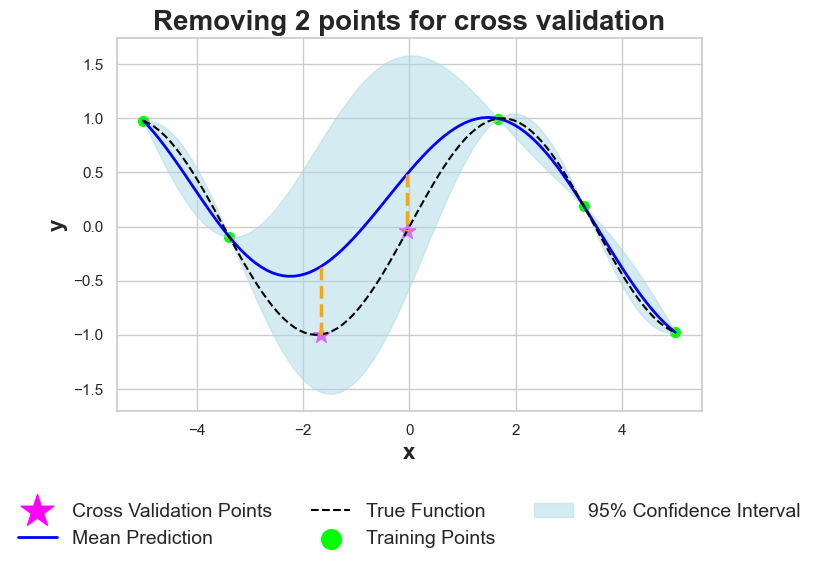

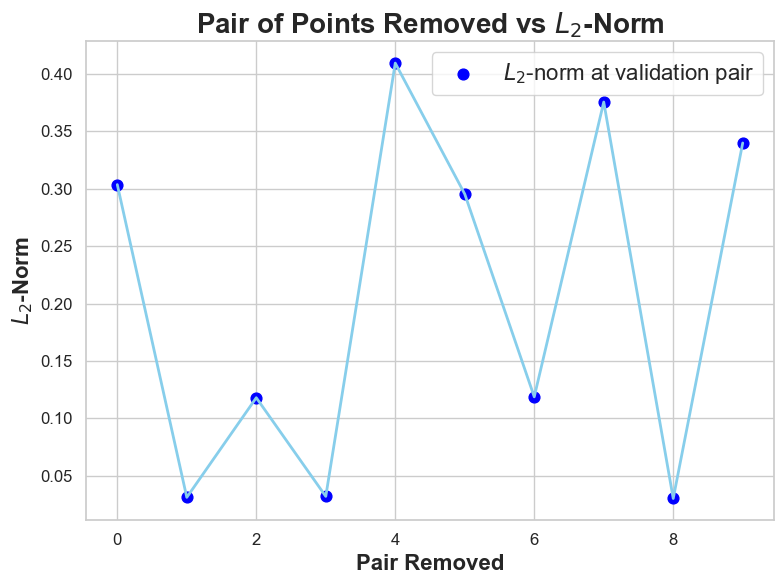

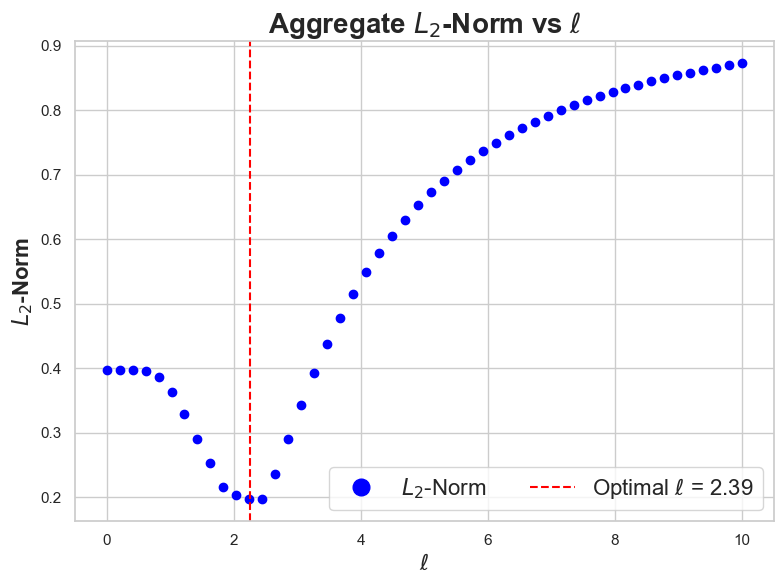

In [99]:
# First Plot: Specific Removed Points
fig, ax = plt.subplots(figsize=(8, 6))
count = 4
xcheck = [xtrain[pairs[count, 0]], xtrain[pairs[count, 1]]]
num = np.array([np.argwhere(x == xchk).item() for xchk in xcheck])
xt = np.delete(xtrain, [pairs[count, 0], pairs[count, 1]])
mean, std = GPR(x, xt, Ntrain, var, l)
ax.scatter([x[num[0]], x[num[1]]], [f(x[num[0]]), f(x[num[1]])],
           s=150, color="magenta", marker='*', label="Cross Validation Points")
ax.plot(x, mean, label="Mean Prediction", color="blue", linewidth=2)
ax.plot(x, f(x), label="True Function", color="black", linestyle="--")
ax.scatter(xt, f(xt), s=50, label="Training Points", color="lime")
ax.fill_between(x, mean - 2 * std, mean + 2 * std, color="lightblue", alpha=0.5, label="95% Confidence Interval")
ax.plot([x[num[0]], x[num[0]]], [mean[num[0]], f(x[num[0]])], color="orange", linestyle="--", linewidth=2.5)
ax.plot([x[num[1]], x[num[1]]], [mean[num[1]], f(x[num[1]])], color="orange", linestyle="--", linewidth=2.5)
ax.set_title(f"Removing 2 points for cross validation", fontsize=20, weight='bold')
ax.set_xlabel("x", fontsize=16, weight='bold')
ax.set_ylabel("y", fontsize=16, weight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), markerscale=2, fontsize=14, frameon=False, ncol=3)
plt.tight_layout()
plt.savefig("specific_removed_points.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Second Plot: Points Removed vs L2 Norm
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(len(pairwisedif)), pairwisedif, color="skyblue", linewidth=2)
ax.scatter(np.arange(len(pairwisedif)), pairwisedif,s=60,color = "blue",label = '$L_2$-norm at validation pair')
ax.set_title("Pair of Points Removed vs $L_2$-Norm", fontsize=20, weight='bold')
ax.set_xlabel("Pair Removed", fontsize=16, weight='bold')
ax.set_ylabel("$L_2$-Norm", fontsize=16, weight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.legend(loc='upper right',fontsize=16,frameon=True)
#ax.legend(["L2 Norm"], loc='upper center', bbox_to_anchor=(0.5, -0.2), markerscale=2, fontsize=14, frameon=False)
plt.tight_layout()
plt.savefig("points_removed_vs_l2_norm.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Third Plot: L2 Norm vs Length Scale
fig, ax = plt.subplots(figsize=(8, 6))
l_values = np.linspace(0.001, 10, 50)
var = 1
L2l = np.array([L2norm(l) for l in l_values])
ax.plot(l_values, L2l, 'o', label="$L_2$-Norm", color="blue", linewidth=2)
ax.axvline(x=loptimal, color='red', linestyle='--', linewidth=1.5, label="Optimal $\\ell$ = %0.2f"%(l2optimal))
ax.set_title("Aggregate $L_2$-Norm vs $\\ell$", fontsize=20, weight='bold')
ax.set_xlabel("$\\ell$", fontsize=16, weight='bold')
ax.set_ylabel("$L_2$-Norm", fontsize=16, weight='bold')
ax.legend(markerscale=2, fontsize=16,ncol = 2, frameon=True)
plt.tight_layout()
plt.savefig("l2_norm_vs_length_scale.png", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Before and After Optimisation: Graphs

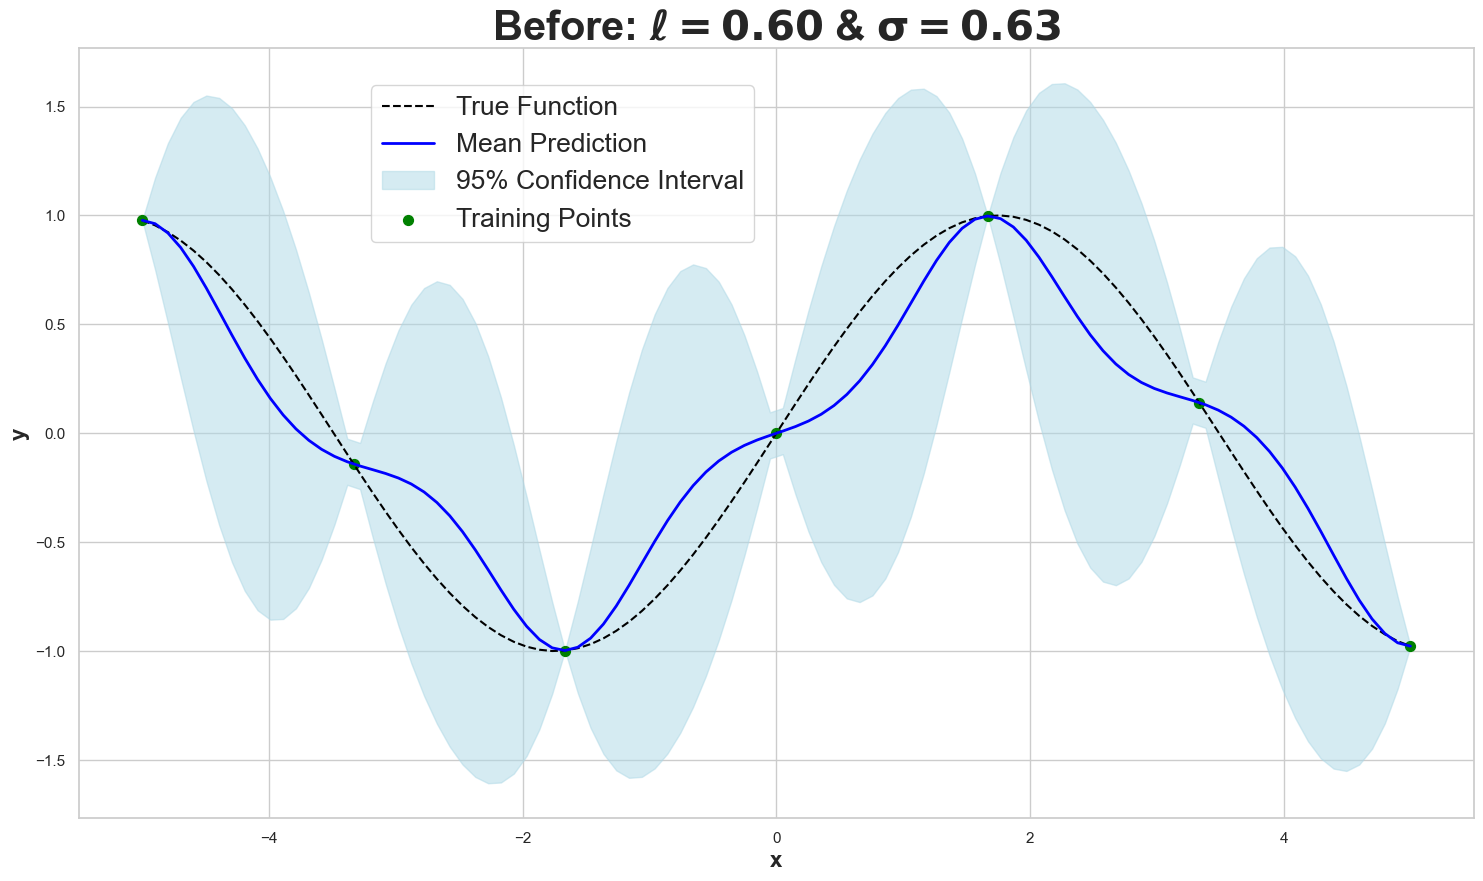

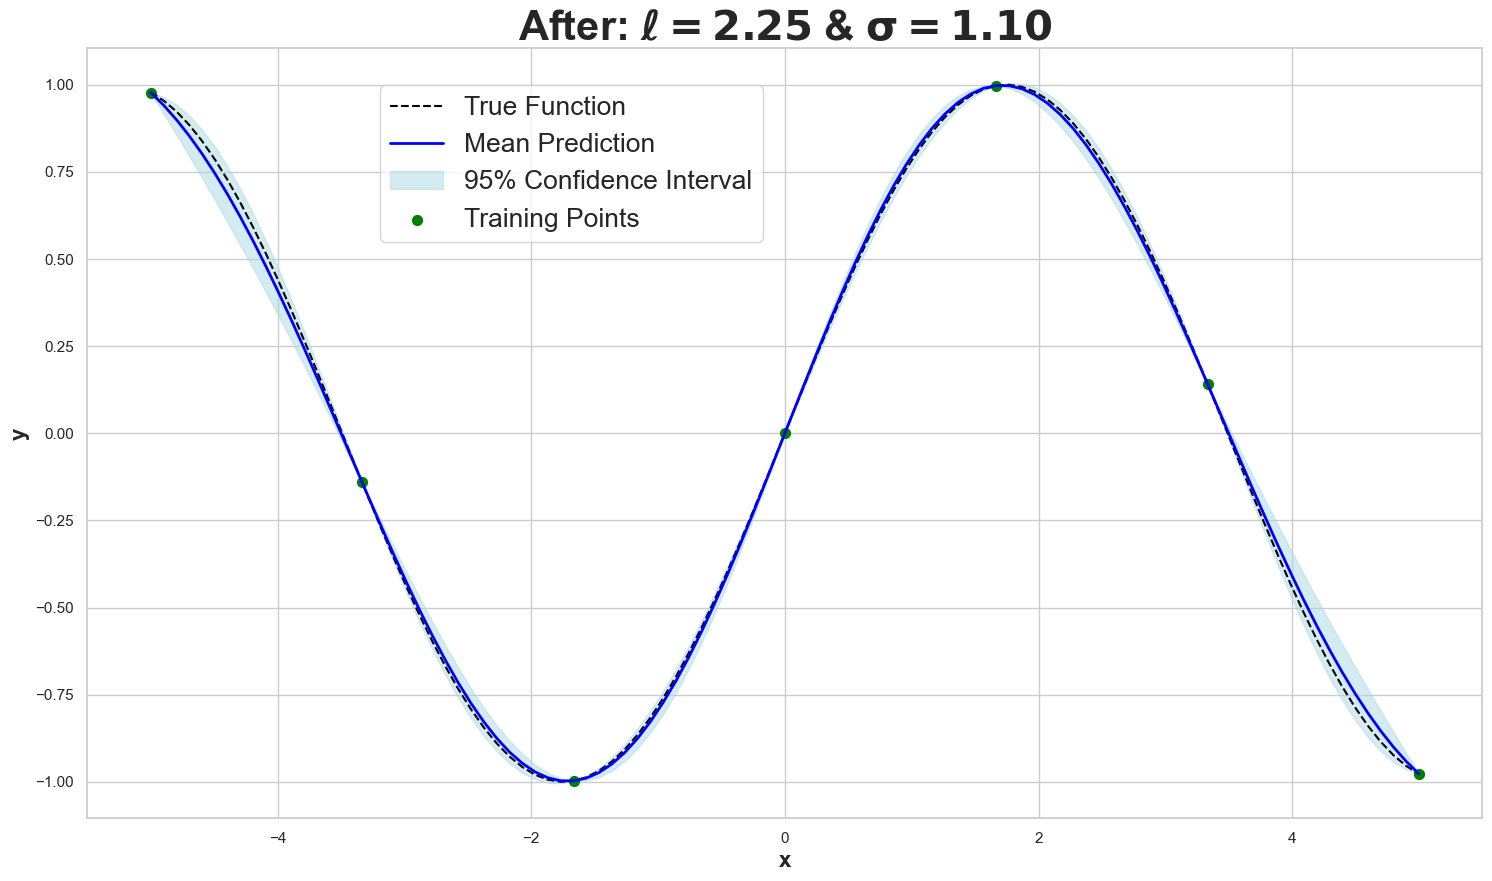

In [102]:
# Seaborn style
sns.set(style="whitegrid")

# Generate data
x = np.linspace(-5, 5, 100)
xtrain = np.linspace(-5, 5, 7)

lbefore = 0.6
varbefore = 0.4

# Compute mean and std for first set of hyperparameters
mean1, std1 = GPR(x, xtrain, 7, varoptimal, loptimal)

# Compute mean and std for second set of hyperparameters
mean2, std2 = GPR(x, xtrain, 7, varbefore, lbefore)

# --- Plot 1: Before parameter optimization ---
plt.figure(figsize=(18, 10))
plt.plot(x, f(x), label="True Function", color="black", linestyle="--")
plt.plot(x, mean2, label="Mean Prediction", color="blue", linewidth=2)
plt.fill_between(x, mean2 - 2 * std2, mean2 + 2 * std2, color="lightblue", alpha=0.5, label="95% Confidence Interval")
plt.scatter(xtrain, f(xtrain), color="green", label="Training Points", s=50)
plt.title(r"Before: $\mathbf{\ell = %0.2f}$ & $\mathbf{\sigma = %0.2f}$" % (lbefore, np.sqrt(varbefore)),
          fontsize=30, weight='bold')
plt.xlabel("x", fontsize=16, weight='bold')
plt.ylabel("y", fontsize=16, weight='bold')
# plt.legend(
#    loc='center left',
#    bbox_to_anchor=(-0.45, 0.5),  # Position the legend outside on the right
#    fontsize=19,
#    frameon=True
# )
plt.legend(
   loc='center left',
   bbox_to_anchor=(0.2, 0.85),  # Position the legend outside on the right
   fontsize=19,
   frameon=True
)
plt.savefig("GPR_Before_Optimisation.png", bbox_inches="tight", dpi=300)
plt.show()

# --- Plot 2: After parameter optimization ---
plt.figure(figsize=(18, 10))
plt.plot(x, f(x), label="True Function", color="black", linestyle="--")
plt.plot(x, mean1, label="Mean Prediction", color="blue", linewidth=2)
plt.fill_between(x, mean1 - 2 * std1, mean1 + 2 * std1, color="lightblue", alpha=0.5, label="95% Confidence Interval")
plt.scatter(xtrain, f(xtrain), color="green", label="Training Points", s=50)
plt.title(r"After: $\mathbf{\ell = %0.2f}$ & $\mathbf{\sigma = %0.2f}$" % (loptimal, np.sqrt(varoptimal)),
          fontsize=30, weight='bold')
plt.xlabel("x", fontsize=16, weight='bold')
plt.ylabel("y", fontsize=16, weight='bold')
plt.legend(
   loc='center left',
   bbox_to_anchor=(0.2, 0.85),  # Position the legend outside on the right
   fontsize=19,
   frameon=True
)
plt.savefig("GPR_After_Optimisation.png", bbox_inches="tight", dpi=300)
plt.show()